# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
# Import necessary libraries for data analysis
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [2]:
# Load the image-predictions file
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [3]:
# Load the tweet-json.txt file
df = pd.read_json ('tweet-json.txt', lines=True);
df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [5]:
df.dtypes

created_at                       datetime64[ns, UTC]
id                                             int64
id_str                                         int64
full_text                                     object
truncated                                       bool
display_text_range                            object
entities                                      object
extended_entities                             object
source                                        object
in_reply_to_status_id                        float64
in_reply_to_status_id_str                    float64
in_reply_to_user_id                          float64
in_reply_to_user_id_str                      float64
in_reply_to_screen_name                       object
user                                          object
geo                                          float64
coordinates                                  float64
place                                         object
contributors                                 f

In [6]:
df.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


In [7]:
archive = pd.read_csv('twitter_archive_enhanced.csv')
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
predictions = pd.read_csv('image-predictions.tsv', sep='\t')
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [9]:
df[df['retweeted'] == True].count()

created_at                       0
id                               0
id_str                           0
full_text                        0
truncated                        0
display_text_range               0
entities                         0
extended_entities                0
source                           0
in_reply_to_status_id            0
in_reply_to_status_id_str        0
in_reply_to_user_id              0
in_reply_to_user_id_str          0
in_reply_to_screen_name          0
user                             0
geo                              0
coordinates                      0
place                            0
contributors                     0
is_quote_status                  0
retweet_count                    0
favorite_count                   0
favorited                        0
retweeted                        0
possibly_sensitive               0
possibly_sensitive_appealable    0
lang                             0
retweeted_status                 0
quoted_status_id    

In [10]:
df_len_full_text = df.copy()
df_len_full_text['len_full_text'] = df_len_full_text['full_text'].str.len()
df_len_full_text[["full_text", "display_text_range", "len_full_text"]]

,full_text,display_text_range,len_full_text
0,This is Phineas. He's a mystical boy. Only eve...,"[0, 85]",109
1,This is Tilly. She's just checking pup on you....,"[0, 138]",162
2,This is Archie. He is a rare Norwegian Pouncin...,"[0, 121]",145
3,This is Darla. She commenced a snooze mid meal...,"[0, 79]",103
4,This is Franklin. He would like you to stop ca...,"[0, 138]",162
...,...,...,...
2349,Here we have a 1949 1st generation vulpix. Enj...,"[0, 120]",120
2350,This is a purebred Piers Morgan. Loves to Netf...,"[0, 137]",137
2351,Here is a very happy pup. Big fan of well-main...,"[0, 130]",130
2352,This is a western brown Mitsubishi terrier. Up...,"[0, 139]",139


In [11]:
df.entities.isna().sum()

0

In [12]:
df.extended_entities.isna().sum()

281

### Quality issues

1. Missing data from columns: **contributors, in_reply_to_screen_name, in_reply_to_status_id, in_reply_to_status_id_str, in_reply_to_user_id, in_reply_to_user_id_str, place, possibly_sensitive, possibly_sensitive_appealable, is_quote_status coordinates, geo, quoted_status, quoted_status_id, quoted_status_id_str, retweeted_status**

2. **Place** column only has one entry at index 857

3. There are 2354 total posts, but only 2073 containing images, so 281 posts did not load the image into the data frame

4. **possibly_sensitive** and **possibly_sensitive_appealable** columns contain mostly 0.0 values with the occasional NaN

5. **display_text_range** values shows inaccurate length of the string **full_text**

6. **entities** column contains too much data in one column

7. **extended_entities** column contains too much data in one column

8. **extended_entities** contians 281 NaNs

### Tidiness issues

1. The dog stage is one variable and hence should form single column. But this variable is spread across 4 columns. 

2.  Information about one type of observational unit (tweets) is spread across three different files/dataframes.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [11]:
# Make copies of original pieces of data
df_copy = df.copy()

### Issue #1: Missing data from columns

#### Define: Drop the columns from the dataset

#### Code

In [12]:
df_copy = df_copy.drop(columns=['display_text_range', 'contributors', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable', 'is_quote_status',  'coordinates', 'geo', 'quoted_status', 'quoted_status_id', 'quoted_status_id_str', 'retweeted_status'])

##### Test

In [13]:
df_copy.head(2)

,created_at,id,id_str,full_text,truncated,entities,extended_entities,source,user,retweet_count,favorite_count,favorited,retweeted,lang
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",8853,39467,False,False,en
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",6514,33819,False,False,en


### Issue #2: display_text_range values shows inaccurate length of the string full_text

#### Define: Create a new column and calculate a new len_full_text length

#### Code

In [18]:
# Create the new column named 'len_full_text' and calculate the length of the characters
df_copy['len_full_text'] = df_copy['full_text'].str.len()

##### Test

In [19]:
# Filter the view for a quick and easy check on the results
df_copy[["full_text", "len_full_text"]]

,full_text,len_full_text
0,This is Phineas. He's a mystical boy. Only eve...,109
1,This is Tilly. She's just checking pup on you....,162
2,This is Archie. He is a rare Norwegian Pouncin...,145
3,This is Darla. She commenced a snooze mid meal...,103
4,This is Franklin. He would like you to stop ca...,162
...,...,...
2349,Here we have a 1949 1st generation vulpix. Enj...,120
2350,This is a purebred Piers Morgan. Loves to Netf...,137
2351,Here is a very happy pup. Big fan of well-main...,130
2352,This is a western brown Mitsubishi terrier. Up...,139


### Issue #3: Incorrect data types

##### Define

Many columns (tweet_id, id, id_str, etc) have integer data types instead of string data types. Also categorical data types should be of *category* data type. Also datetime data types for those columns.

##### Code

In [20]:
# Convert the column types to 'string'
df_copy['id'] = df_copy['id'].apply(str)
df_copy['id_str'] = df_copy['id_str'].apply(str)
predictions['tweet_id'] = predictions['tweet_id'].apply(str)
archive['tweet_id'] = archive['tweet_id'].apply(str)

# Convert the column types to 'category'
for col in ['p1', 'p2', 'p3']:
    predictions[col] = predictions[col].astype('category')

# Convert the column types to 'datetime'
archive['timestamp']= pd.to_datetime(archive['timestamp'])
archive['rating_numerator'] = pd.to_numeric(archive['rating_numerator'])
archive['rating_denominator'] = pd.to_numeric(archive['rating_denominator'])

##### Test

In [21]:
print("df_copy dtypes:")
print(df_copy.dtypes)
print()
print("archive dtypes:")
print(archive.dtypes)
print()
print("predictions dtypes:")
print(predictions.dtypes)

df_copy dtypes:
created_at           datetime64[ns, UTC]
id                                object
id_str                            object
full_text                         object
truncated                           bool
entities                          object
extended_entities                 object
source                            object
user                              object
retweet_count                      int64
favorite_count                     int64
favorited                           bool
retweeted                           bool
lang                              object
len_full_text                      int64
dtype: object

archive dtypes:
tweet_id                                   object
in_reply_to_status_id                     float64
in_reply_to_user_id                       float64
timestamp                     datetime64[ns, UTC]
source                                     object
text                                       object
retweeted_status_id                   

### Issue #4: Invalid dog names

##### Define

Clean invalid dog names like a, such, getting etc.

##### Code

In [22]:
# Put names to clean in a list
names_to_clean = ['None', 'a', 'an', 'such', 'the', 'quite', 'Quite']

# Clean invalid dog names using for loop, replacing invalid names with a blank string
for i in names_to_clean:
    archive.name.replace(i, '', inplace=True)

# Make all names capitalized
archive['name'] = archive['name'].str.capitalize()

##### Test

In [27]:
# Search for the list of names we just cleaned, filtering by just the "name" column for easier view
archive.loc[archive["name"].isin(names_to_clean), ["name"]]

# As we can see below, the search returns empty, meaning the names we cleaned are no longer there

,name


### Issue #5: Some of the rating numerators and denominators are not correctly extracted

##### Define

 For instance, 9.75 is extracted as 75. Extract the rating from the text column and place them in the numerator and denominator columns

##### Code

In [29]:
# Use regular expression to extract the rating numerator from the 'text' column and store in new variable of type int
archive['rating_numerator'] = archive['text'].str.extract(r'(\d+)').astype('int')

# Use regular expression to extract the rating denominator from the 'text' column and store in new variable of type int
archive['rating_denominator'] = archive['text'].str.extract(r'\d+/(\d+)').astype('int')

##### Test

In [30]:
archive[['rating_numerator', 'rating_denominator']]

,rating_numerator,rating_denominator
0,13,10
1,13,10
2,12,10
3,13,10
4,12,10
...,...,...
2351,1949,10
2352,6,10
2353,9,10
2354,2,10


### Issue #6: None in doggo, floofer, pupper, puppo columns is treated as a non-null value

##### Define

This should be converted to null np.nan

##### Code

In [39]:
# Replace the blank values in the columns with np.nan, which translates to 'None'
archive['doggo'].replace('', np.nan, inplace=True)
archive['floofer'].replace('', np.nan, inplace=True)
archive['pupper'].replace('', np.nan, inplace=True)
archive['puppo'].replace('', np.nan, inplace=True)

##### Test

In [40]:
archive[["name", "doggo", "floofer", "pupper", "puppo"]].head(20)

,name,doggo,floofer,pupper,puppo
0,Phineas,None,None,None,None
1,Tilly,None,None,None,None
2,Archie,None,None,None,None
3,Darla,None,None,None,None
4,Franklin,None,None,None,None
5,,None,None,None,None
6,Jax,None,None,None,None
7,,None,None,None,None
8,Zoey,None,None,None,None
9,Cassie,doggo,None,None,None


### Issue #7: Column headers should be more descriptive

##### Define

Rename columns. examples of non-descriptive column header are img_num, p1, p1_conf, p1_dog, etc.

##### Code

In [46]:
# Rename columns
predictions.rename(columns = {'p1':'breed1', 'p2':'breed2', 'p3':'breed3', 'p1_conf':'rating1', 'p2_conf':'rating2', 
                             'p3_conf':'rating3'}, inplace = True)

##### Test

In [45]:
# Filter by just those columns for easier viewing
predictions[["breed1", "breed2", "breed3", "rating1", "rating2", "rating3"]].head()

,breed1,breed2,breed3,rating1,rating2,rating3
0,Welsh_springer_spaniel,collie,Shetland_sheepdog,0.465074,0.156665,0.061428
1,redbone,miniature_pinscher,Rhodesian_ridgeback,0.506826,0.074192,0.072010
2,German_shepherd,malinois,bloodhound,0.596461,0.138584,0.116197
3,Rhodesian_ridgeback,redbone,miniature_pinscher,0.408143,0.360687,0.222752
4,miniature_pinscher,Rottweiler,Doberman,0.560311,0.243682,0.154629


### Issue #8: Source column contains HTML tags making it harder to read

##### Define

Remove html tags from source column to make it more readable

##### Code

In [48]:
# Create new column called 'clean_soure' and strip out the HTML code, keeping only the text from 'source' column
archive['clean_source'] = archive['source'].apply(lambda x: pd.Series(x).str.replace('<.*?>', ''))

##### Test

In [52]:
archive[["source", "clean_source"]].head()

,source,clean_source
0,"<a href=""http://twitter.com/download/iphone"" r...",Twitter for iPhone
1,"<a href=""http://twitter.com/download/iphone"" r...",Twitter for iPhone
2,"<a href=""http://twitter.com/download/iphone"" r...",Twitter for iPhone
3,"<a href=""http://twitter.com/download/iphone"" r...",Twitter for iPhone
4,"<a href=""http://twitter.com/download/iphone"" r...",Twitter for iPhone


### Tidyness Issue #1: The dog stage is one variable and hence should form single column

##### Code

In [56]:
# Replace None in stage columns with empty string as follows.
archive.doggo.replace('None', '', inplace=True) 
archive.floofer.replace('None', '', inplace=True)
archive.pupper.replace('None', '', inplace=True)
archive.puppo.replace('None', '', inplace=True)

# Combine stage columns.
archive['stage'] = archive.doggo + archive.floofer + archive.pupper + archive.puppo

# Change the 'stage' column to type 'category'
archive['stage'] = archive['stage'].astype('category')

##### Test

In [57]:
archive.stage.dtypes

CategoricalDtype(categories=['', 'doggo', 'doggofloofer', 'doggopupper', 'doggopuppo',
                  'floofer', 'pupper', 'puppo'],
                 ordered=False)

### Tidyness Issue #2 - Information about one type of observational unit (tweets) is spread across three different files/dataframes.

#####  Code

In [58]:
# Merge the separate dataframes into one
merged_df = pd.concat([df_copy, archive, predictions], sort=True)

##### Test

In [60]:
merged_df

,breed1,breed2,breed3,clean_source,created_at,doggo,entities,expanded_urls,extended_entities,favorite_count,...,retweeted_status_id,retweeted_status_timestamp,retweeted_status_user_id,source,stage,text,timestamp,truncated,tweet_id,user
0,NaN,NaN,NaN,NaN,2017-08-01 16:23:56+00:00,NaN,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'media': [{'id': 892420639486877696, 'id_str'...",39467.0,...,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaT,False,NaN,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,NaN,NaN,2017-08-01 00:17:27+00:00,NaN,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'media': [{'id': 892177413194625024, 'id_str'...",33819.0,...,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaT,False,NaN,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,NaN,NaN,2017-07-31 00:18:03+00:00,NaN,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'media': [{'id': 891815175371796480, 'id_str'...",25461.0,...,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaT,False,NaN,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,NaN,NaN,2017-07-30 15:58:51+00:00,NaN,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'media': [{'id': 891689552724799489, 'id_str'...",42908.0,...,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaT,False,NaN,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,NaN,NaN,2017-07-29 16:00:24+00:00,NaN,"{'hashtags': [{'text': 'BarkWeek', 'indices': ...",NaN,"{'media': [{'id': 891327551943041024, 'id_str'...",41048.0,...,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaT,False,NaN,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,basset,English_springer,German_short-haired_pointer,NaN,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,891327558926688256,NaN
2071,paper_towel,Labrador_retriever,spatula,NaN,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,891689557279858688,NaN
2072,Chihuahua,malamute,kelpie,NaN,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,891815181378084864,NaN
2073,Chihuahua,Pekinese,papillon,NaN,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,892177421306343426,NaN


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [63]:
merged_df.to_csv('twitter_archive_master.csv',encoding='utf-8')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1. The most popular dog breed is Golden Retriever

2. The max rating given is 2195

3. The mean (or average) of favorite_count is 8080.968564, which rounded is 8081. 

### Visualization

Text(0, 0.5, 'favorite_count')

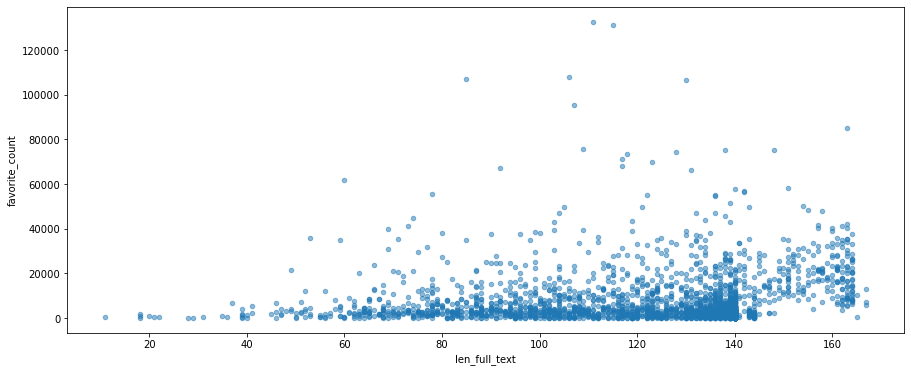

In [61]:
ax1=df_copy.plot(kind='scatter', x='len_full_text', y='favorite_count', alpha=0.5, figsize=(15,6))

#specify x-axis and y-axis labels
ax1.set_xlabel('len_full_text')
ax1.set_ylabel('favorite_count')

In [62]:
max_value = archive['rating_numerator'].max()
max_value

2195

In [63]:
breed1_counts = predictions['breed1'].value_counts()
breed2_counts = predictions['breed2'].value_counts()
breed3_counts = predictions['breed3'].value_counts()

total_counts = breed1_counts.add(breed2_counts, fill_value=0).add(breed3_counts, fill_value=0)
sorted_value_counts = total_counts.sort_values(ascending=False)
sorted_value_counts

golden_retriever      290.0
Labrador_retriever    283.0
Chihuahua             185.0
Pembroke              143.0
Cardigan              115.0
                      ...  
partridge               1.0
passenger_car           1.0
great_grey_owl          1.0
pedestal                1.0
grand_piano             1.0
Length: 634, dtype: float64